In [15]:
import pandas as pd
import numpy as np

In [2]:
# 1. **Data Preprocessing**: Handle missing data, encode categorical variables, scale/normalize numerical features, and perform exploratory data analysis (EDA).
# 2. **Feature Engineering**: Create new features that may help predict churn and address class imbalance if necessary.
# 3. **Model Selection and Training**: Train at least two machine learning models and evaluate their performance using cross-validation.
# 4. **Model Evaluation**: Evaluate models using precision, recall, F1-score, AUC-ROC, and provide a confusion matrix.
# 5. **Hyperparameter Tuning**: Use grid search or random search to optimize model performance.
# 6. **Interpretability**: Use SHAP or LIME to explain the model's predictions and provide a feature importance analysis.
# 7. **(Optional)**: Demonstrate how the model can be saved and deployed.

# #### **Deliverables:**
# Well-documented Python script, including EDA, model results, and interpretations.
# Visualizations of important features and model performance.


In [3]:
churn = pd.read_csv(r"C:\Users\DELL\datasets\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = churn.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
cat = df.select_dtypes(include= 'object').columns.tolist()
cat

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat:
    df[i] = le.fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


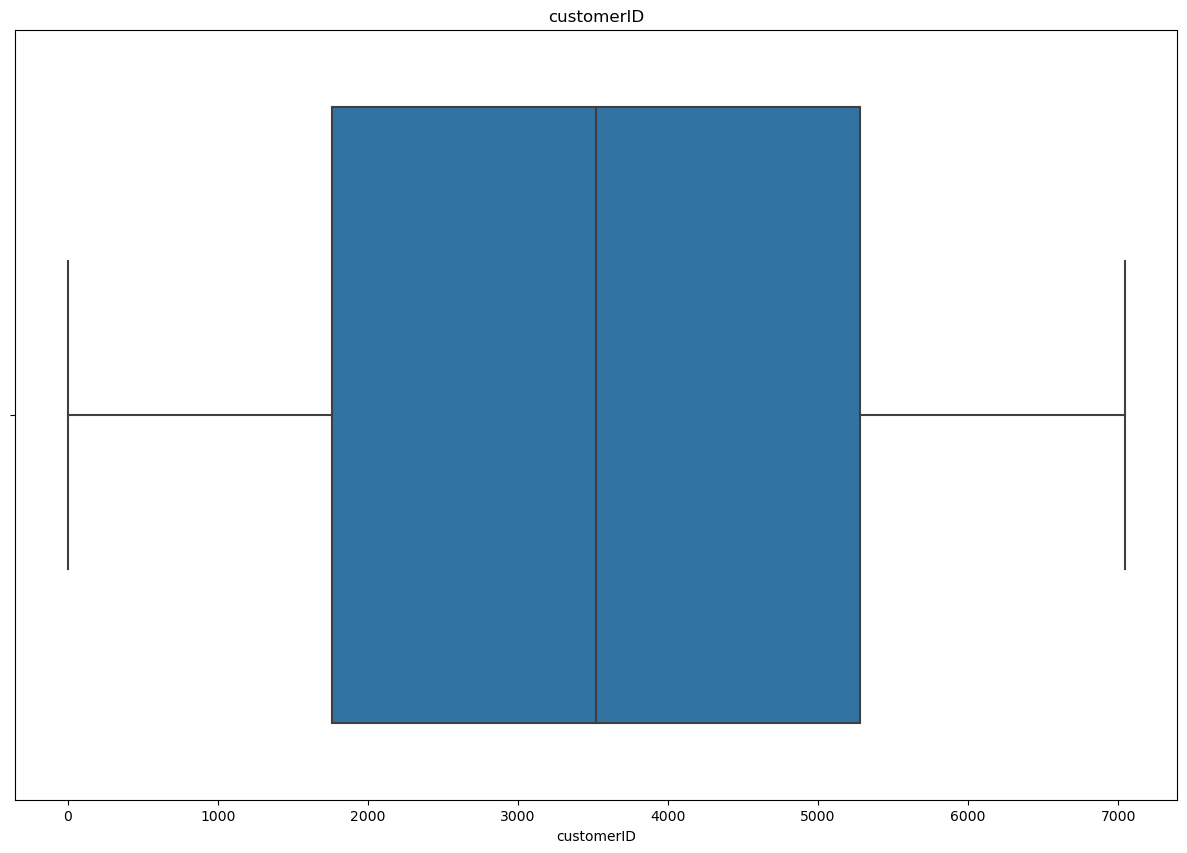

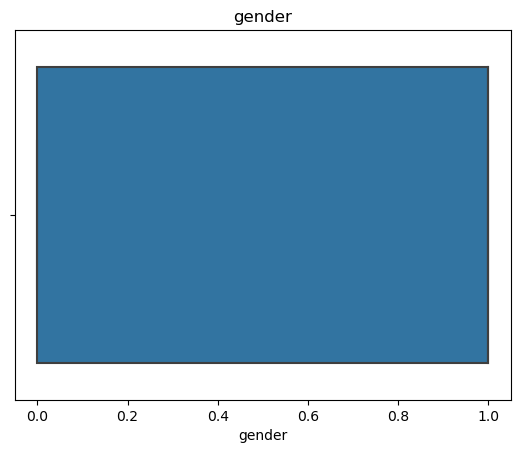

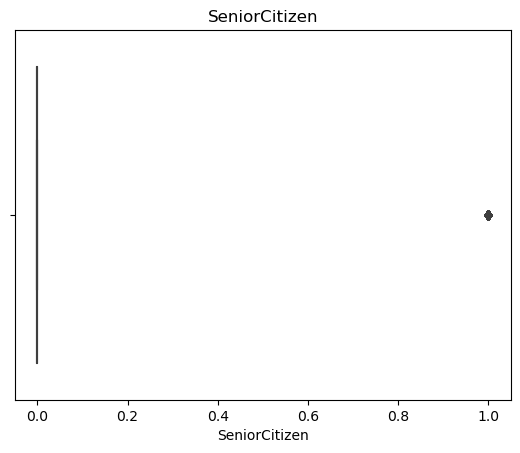

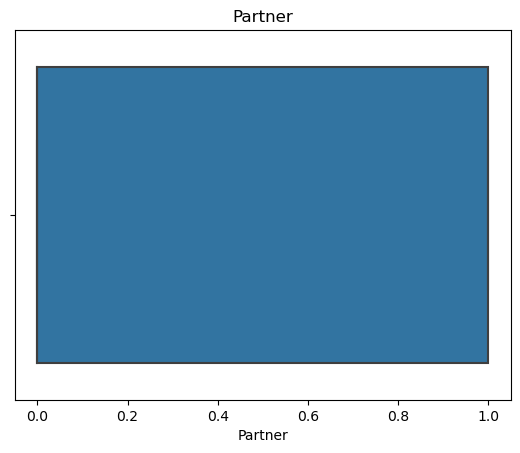

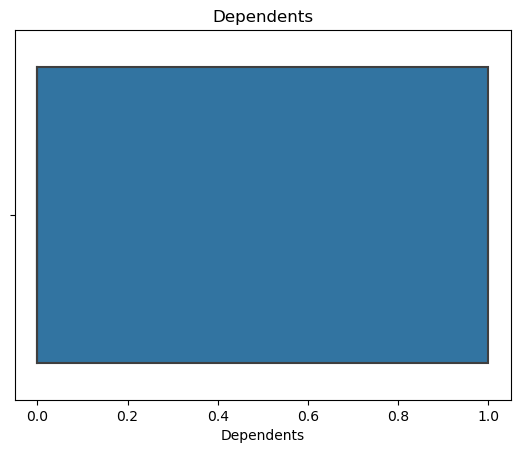

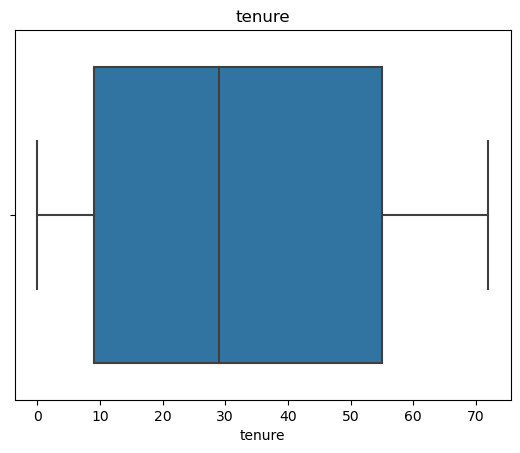

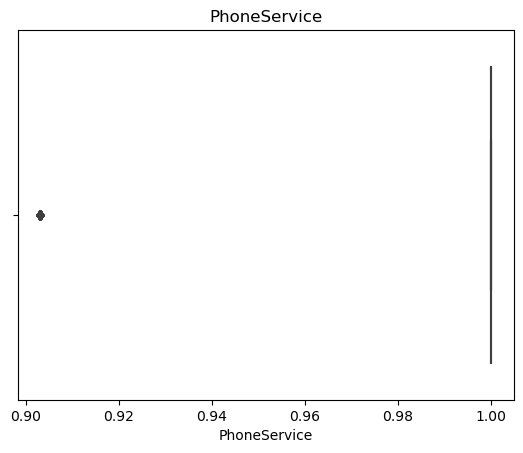

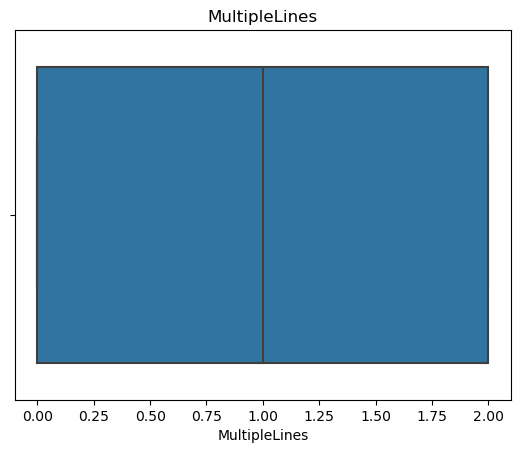

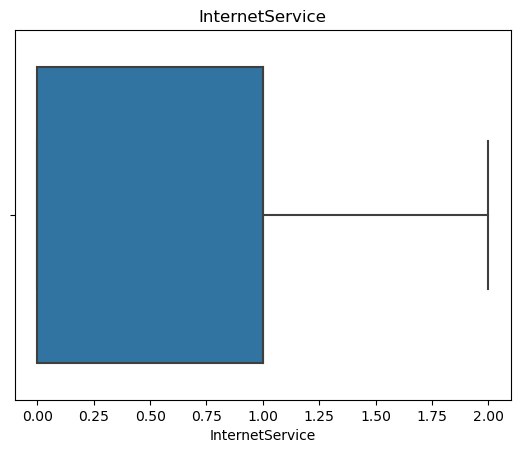

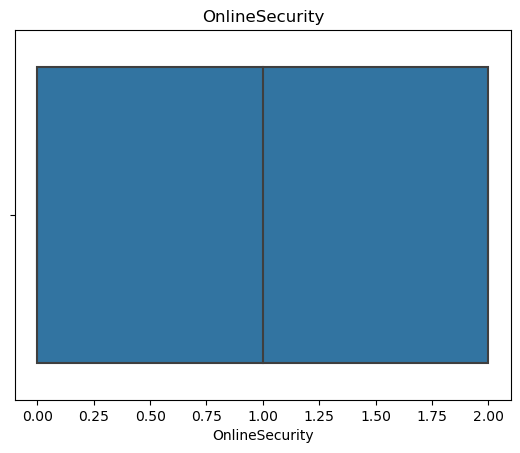

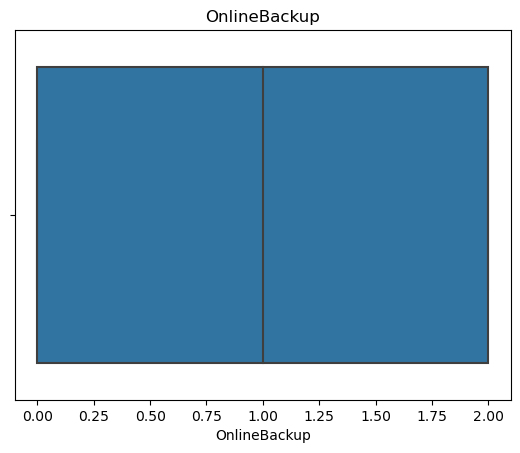

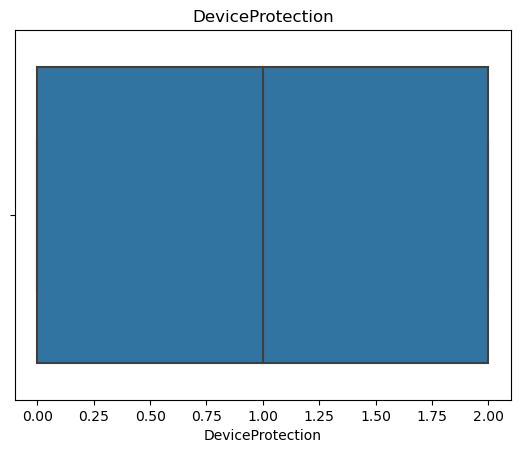

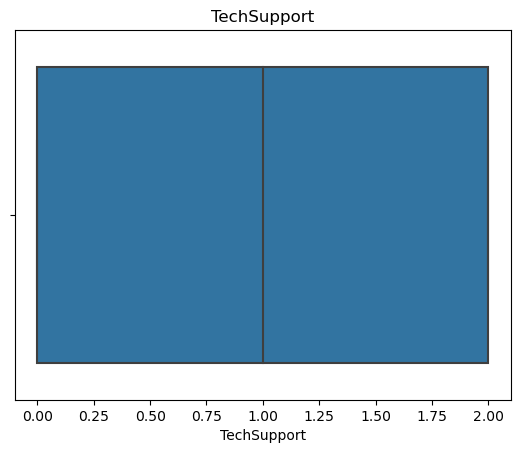

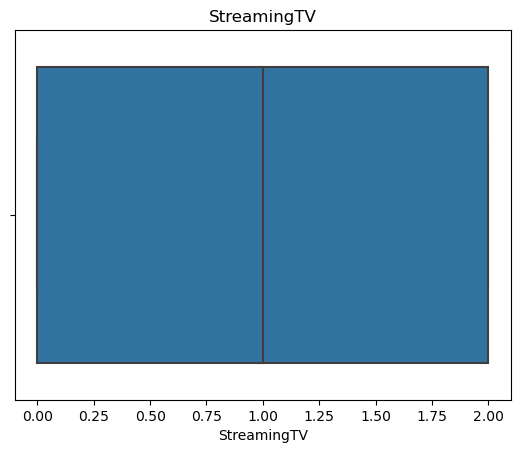

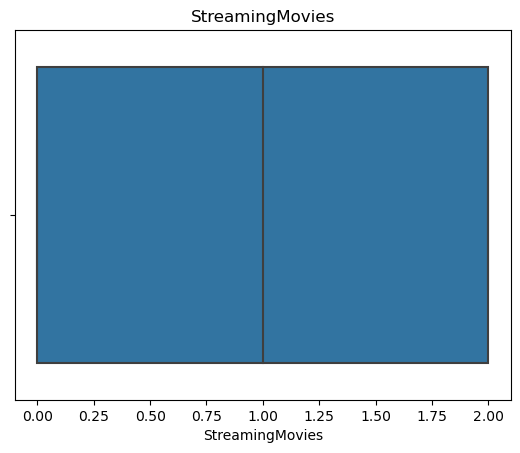

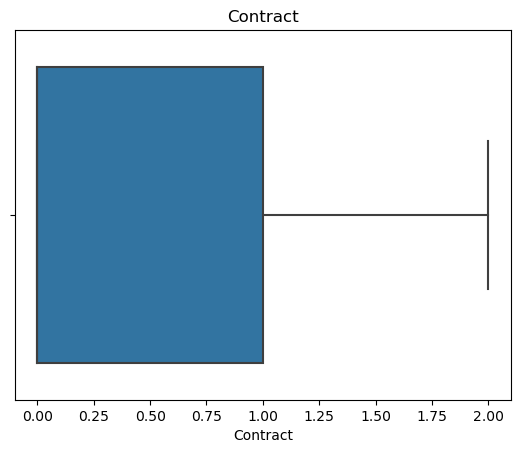

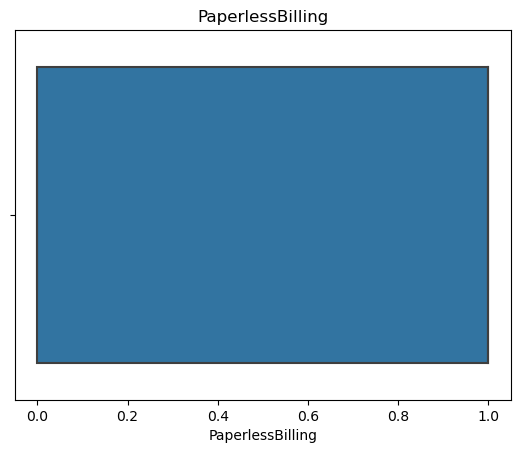

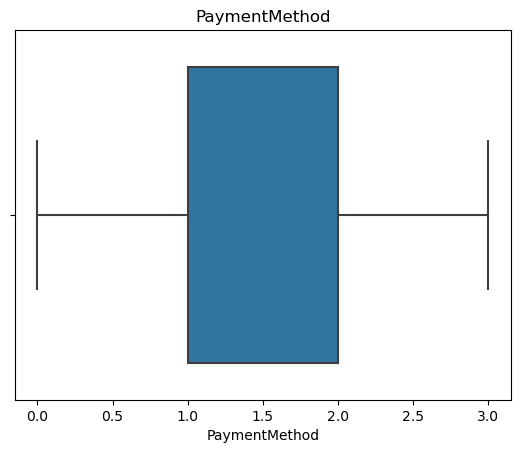

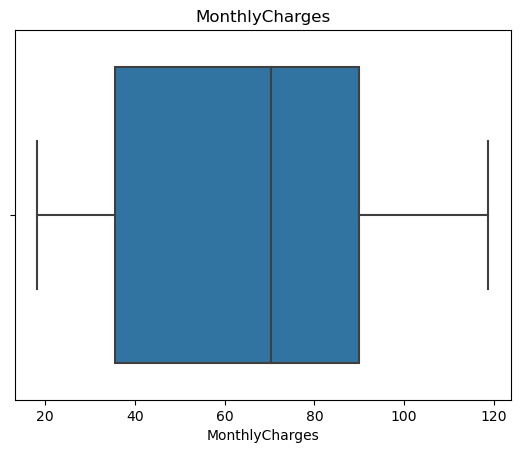

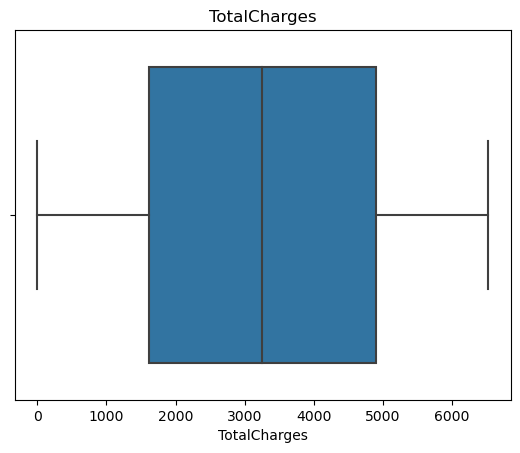

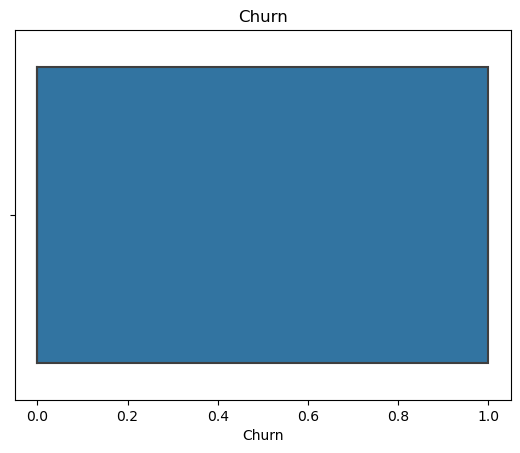

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize= (15, 10))


for i, columns in enumerate(df.columns):
#     plt.subplot(len(df.columns))
    sns.boxplot(x = df[columns])
    plt.title(columns)
    plt.show()

In [38]:
df.drop('customerID', axis = 1, inplace = True)

In [39]:
from scipy.stats import zscore
for i in df.columns:
    z_score = zscore(df[i])
    mean_val = df[i].mean()
    df[i] = np.where(np.abs(z_score)> 3, mean_val, df[i])

In [40]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
rfe = RFE(estimator= linear, n_features_to_select= 15)
rfe.fit(X, y)

ranking = rfe.ranking_
features = pd.Series(ranking, index=X.columns)


In [46]:
features.nlargest(10)

TotalCharges       5
Partner            4
StreamingMovies    3
StreamingTV        2
gender             1
SeniorCitizen      1
Dependents         1
tenure             1
PhoneService       1
MultipleLines      1
dtype: int32

In [47]:
selected_columns = ["TotalCharges",
"Partner",
"StreamingMovies",
"StreamingTV",
"gender",
"SeniorCitizen",
"Dependents",
"tenure",
"PhoneService",
"MultipleLines" ]

In [49]:
X = X[selected_columns]
X

,TotalCharges,Partner,StreamingMovies,StreamingTV,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines
0,2505.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.999912,1.0
1,1466.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,1.000000,0.0
2,157.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.000000,0.0
3,1400.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,0.999912,1.0
4,925.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1597.0,1.0,2.0,2.0,1.0,0.0,1.0,24.0,1.000000,2.0
7039,5698.0,1.0,2.0,2.0,0.0,0.0,1.0,72.0,1.000000,2.0
7040,2994.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0,0.999912,1.0
7041,2660.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.000000,2.0


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score

model1 = LogisticRegression()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_pred, y_test))
print("recall_score: \n", recall_score(y_pred, y_test))

Confusion matrix:
 [[1613  440]
 [  84  188]]
recall_score: 
 0.6911764705882353


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



model2 = RandomForestClassifier()

grid_param = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2,4]
}

grid_search = GridSearchCV(estimator= model2, param_grid= grid_param, cv = 5, n_jobs= -1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]},
             verbose=2)

In [68]:
print('Best_params: ', grid_search.best_params_)
print('Best_estimator', grid_search.best_estimator_)

Best_params:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
Best_estimator RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=20)


In [74]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


print("Confusion matrix:\n", confusion_matrix(y_pred, y_test))
print("recall_score: \n", recall_score(y_pred, y_test))

Confusion matrix:
 [[1558  368]
 [ 139  260]]
recall_score: 
 0.6516290726817042


In [78]:
# pip install lime

In [82]:
df['Churn'].unique()

array([0., 1.])

In [89]:
import lime
import lime.lime_tabular

predict_rf = lambda x: best_model.predict_proba(x).astype(float)

X = X_train.values

explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=X_train.columns,
                                                   class_names= ["Churn_true", "Churn_false"], 
                                                   kernel_width= 5)


In [90]:
X_test.head()

,TotalCharges,Partner,StreamingMovies,StreamingTV,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines
185,2044.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.999912,1.0
2715,6522.0,0.0,1.0,1.0,1.0,0.0,0.0,41.0,1.000000,2.0
3825,67.0,1.0,1.0,1.0,0.0,0.0,1.0,52.0,1.000000,0.0
1807,5822.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0
132,2837.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,1.000000,0.0


In [93]:

choosen_instance = X_test.loc[2715].values[0]
# exp = explainer.explain_instance(choosen_instance, predict_rf, num_features= 10)